<h3><center> <span style = "font-family: Babas; font-size: 2em;">Robust Anomaly Detection System for Credit Card Transactions </span> </center></h3>
<h4><center> <span style = "font-family: Babas; font-size: 2em;"> By  </span> </center></h4>
<h4><center> <span style = "font-family: Babas; font-size: 2em;"> Prince Appiah & Nikhili Kukkala </span> </center></h4>

### Importing libraries

In [1]:
# File system manangement
import time, psutil, os, gc

# Mathematical functions
import math

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

# Train-test split
from sklearn.model_selection import train_test_split

# Progress bar for loop
from tqdm.contrib import itertools

### Runtime and memory usage

In [2]:
# Recording the starting time, complemented with a stopping time check in the end to compute process runtime
start = time.time()

# Class representing the OS process and having memory_info() method to compute process memory usage
process = psutil.Process(os.getpid())

In [3]:
# Loading the data
data = pd.read_csv('creditcard.csv')
print(pd.Series({"Memory usage": "{:.2f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())
data.head()

Memory usage         67.32 MB
Dataset shape    (284617, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,142398.000000,142398.000000,142398.000000,142398.000000,142398.000000,142398.000000,142398.000000,142398.000000,142398.000000,142398.000000,...,142398.000000,142398.000000,142398.000000,142398.000000,142398.000000,142398.000000,142398.000000,142398.000000,142398.000000,142398.000000
mean,52401.788726,-0.249340,0.020759,0.673749,0.137180,-0.282944,0.078231,-0.118224,0.064948,-0.089152,...,-0.039747,-0.117931,-0.033258,0.011248,0.130892,0.021569,0.000707,0.002266,90.688803,0.001889
std,21104.049666,1.814073,1.610324,1.266025,1.322367,1.305017,1.282525,1.165540,1.233603,1.090301,...,0.721197,0.634609,0.589856,0.595725,0.437319,0.492376,0.388679,0.306213,246.463581,0.043423
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,38189.250000,-1.021137,-0.560016,0.171460,-0.718073,-0.903788,-0.662012,-0.604824,-0.130529,-0.713220,...,-0.225797,-0.547066,-0.171829,-0.325901,-0.135881,-0.327179,-0.060091,-0.004177,5.990000,0.000000
50%,54201.000000,-0.271634,0.105975,0.750693,0.164320,-0.315387,-0.177310,-0.064752,0.081068,-0.153461,...,-0.059508,-0.094202,-0.045136,0.068257,0.167470,-0.066466,0.012141,0.023615,23.560000,0.000000
75%,70127.000000,1.158516,0.777698,1.363692,0.991356,0.236511,0.463229,0.409052,0.375307,0.487224,...,0.113082,0.300538,0.083063,0.408249,0.420212,0.284532,0.087770,0.077027,80.100000,0.000000
max,84688.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


# Train-Validation-Test Split

In [6]:
# Splitting the data by target class
data_0, data_1 = data[data['Class'] == 0], data[data['Class'] == 1]

# Feature-target split
X_0, y_0 = data_0.drop('Class', axis = 1), data_0['Class']
X_1, y_1 = data_1.drop('Class', axis = 1), data_1['Class']

# Splitting the authentic class and constructing the training set
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size = 0.2, random_state = 40)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)
data_val_1, data_test_1 = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Splitting the fraudulent class
X_val, X_test, y_val, y_test = train_test_split(X_1, y_1, test_size = 0.5, random_state = 40)
data_val_2, data_test_2 = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Merging data to construct the validation set and the test set
data_val, data_test = pd.concat([data_val_1, data_val_2], axis = 0), pd.concat([data_test_1, data_test_2], axis = 0)
X_val, y_val = data_val.drop('Class', axis = 1), data_val['Class']
X_test, y_test = data_test.drop('Class', axis = 1), data_test['Class']

In [8]:
# Distribution of authentic and fraudulent transactions over training, validation and test set
labels = ['Train', 'Validation', 'Test']
values_0 = [len(y_train[y_train == 0]), len(y_val[y_val == 0]), len(y_test[y_test == 0])]
values_1 = [len(y_train[y_train == 1]), len(y_val[y_val == 1]), len(y_test[y_test == 1])]
fig = make_subplots(rows = 1, cols = 2, specs = [[{'type': 'domain'}, {'type': 'domain'}]])
fig.add_trace(go.Pie(values = values_0, labels = labels, hole = 0.5, textinfo = 'percent', title = "Authentic"),
              row = 1, col = 1)
fig.add_trace(go.Pie(values = values_1, labels = labels, hole = 0.5, textinfo = 'percent', title = "Fraudulent"),
              row = 1, col = 2)
text_title = "The distribution of authentic and fraudulent transactions over training, validation and test set"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

In general, throughout the notebook, we choose the number of bins of a histogram by the [**Freedman-Diaconis rule**](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule), which suggests the optimal number of bins to grow as $k \sim n^{1/3},$ where $n$ is the total number of observations.

In [10]:
# Setting the number of bins
bins_train = math.floor(len(X_train)**(1/3))

# Feature Engineering

## Time

In [8]:
# Decomposing time
for df in [X_train, X_val, X_test]:
    df['Day'], temp = df['Time'] // (24*60*60), df['Time'] % (24*60*60)
    df['Hour'], temp = temp // (60*60), temp % (60*60)
    df['Minute'], df['Second'] = temp // 60, temp % 60
X_train[['Time', 'Day', 'Hour', 'Minute', 'Second']].head()

,Time,Day,Hour,Minute,Second
19594,30401.0,0.0,8.0,26.0,41.0
124712,77397.0,0.0,21.0,29.0,57.0
167920,118964.0,1.0,9.0,2.0,44.0
47377,43191.0,0.0,11.0,59.0,51.0
41731,40804.0,0.0,11.0,20.0,4.0


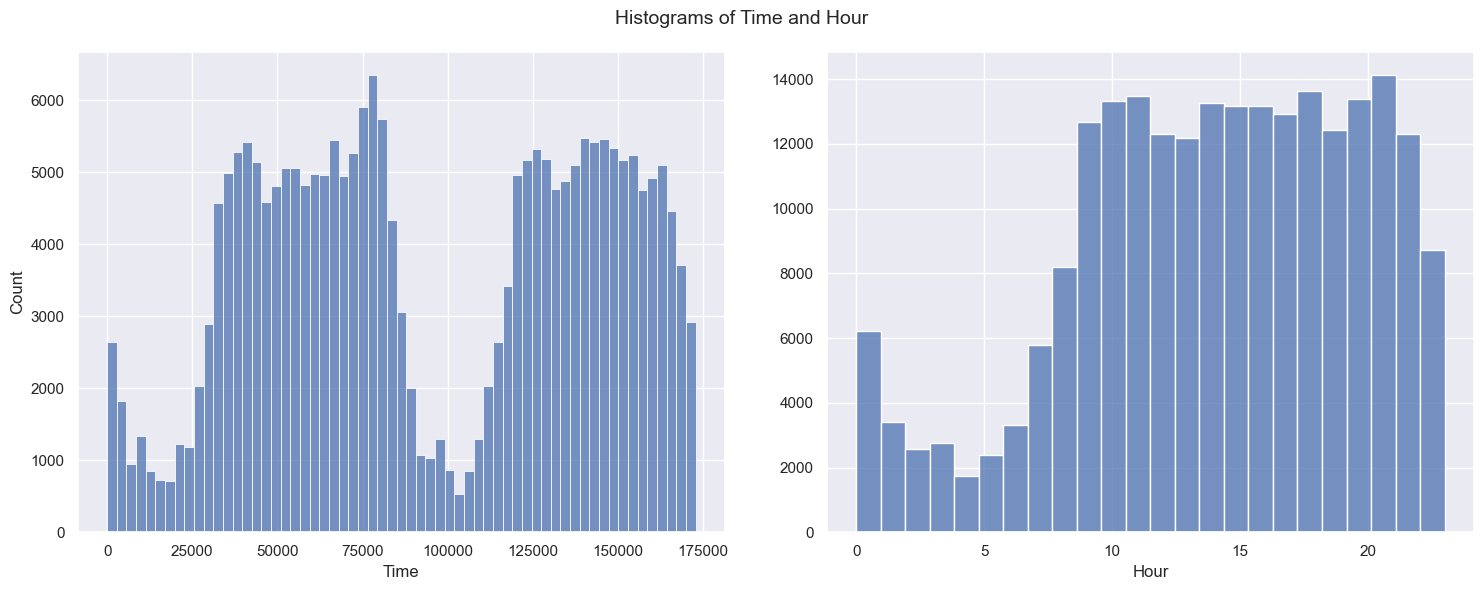

In [11]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharey = False)
sns.histplot(data = X_train, x = 'Time', bins = bins_train, ax = ax[0])
sns.histplot(data = X_train, x = 'Hour', bins = 24, ax = ax[1])
ax[1].set_ylabel(" ")
plt.suptitle("Histograms of Time and Hour", size = 14)
plt.tight_layout()
plt.show()

## Amount

The distribution of `Amount` has extreme positive skewness. We apply the transformation $x \mapsto \log{\left(x + 0.001\right)}$ to this column and form the new column `Amount_transformed`. The positive constant $0.001$ is added to deal with the zero-amount transactions, which leads to $\log{0}$, an undefined quantity.

In [9]:
# Transformation of 'Amount'
for df in [X_train, X_val, X_test]:
    df['Amount_transformed'] = np.log10(df['Amount'] + 0.001)

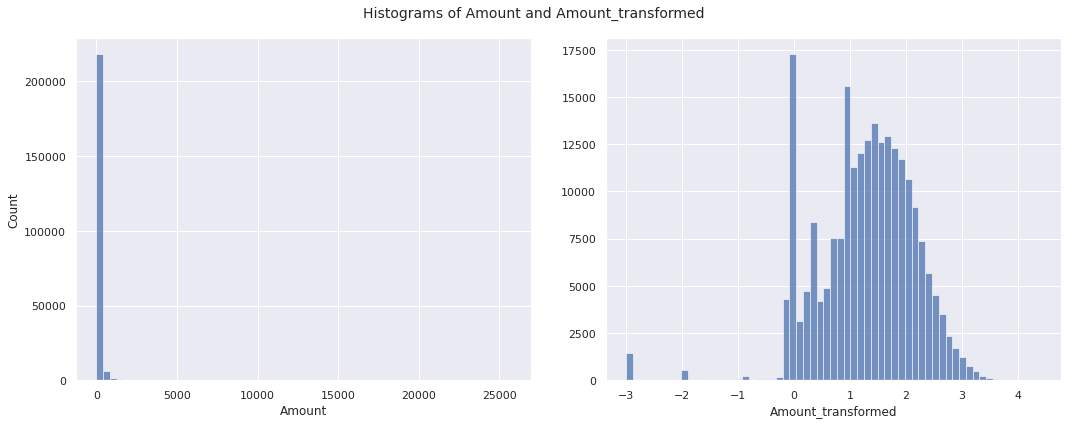

In [10]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharey = False)
sns.histplot(data = X_train, x = 'Amount', bins = bins_train, ax = ax[0])
sns.histplot(data = X_train, x = 'Amount_transformed', bins = bins_train, ax = ax[1])
ax[1].set_ylabel(" ")
plt.suptitle("Histograms of Amount and Amount_transformed", size = 14)
plt.tight_layout()
plt.show()

In [11]:
# Discarding unnecessary columns
for df in [X_train, X_val, X_test]:
    df.drop(['Time', 'Day', 'Minute', 'Second', 'Amount'], axis = 1, inplace = True)

# Feature Selection

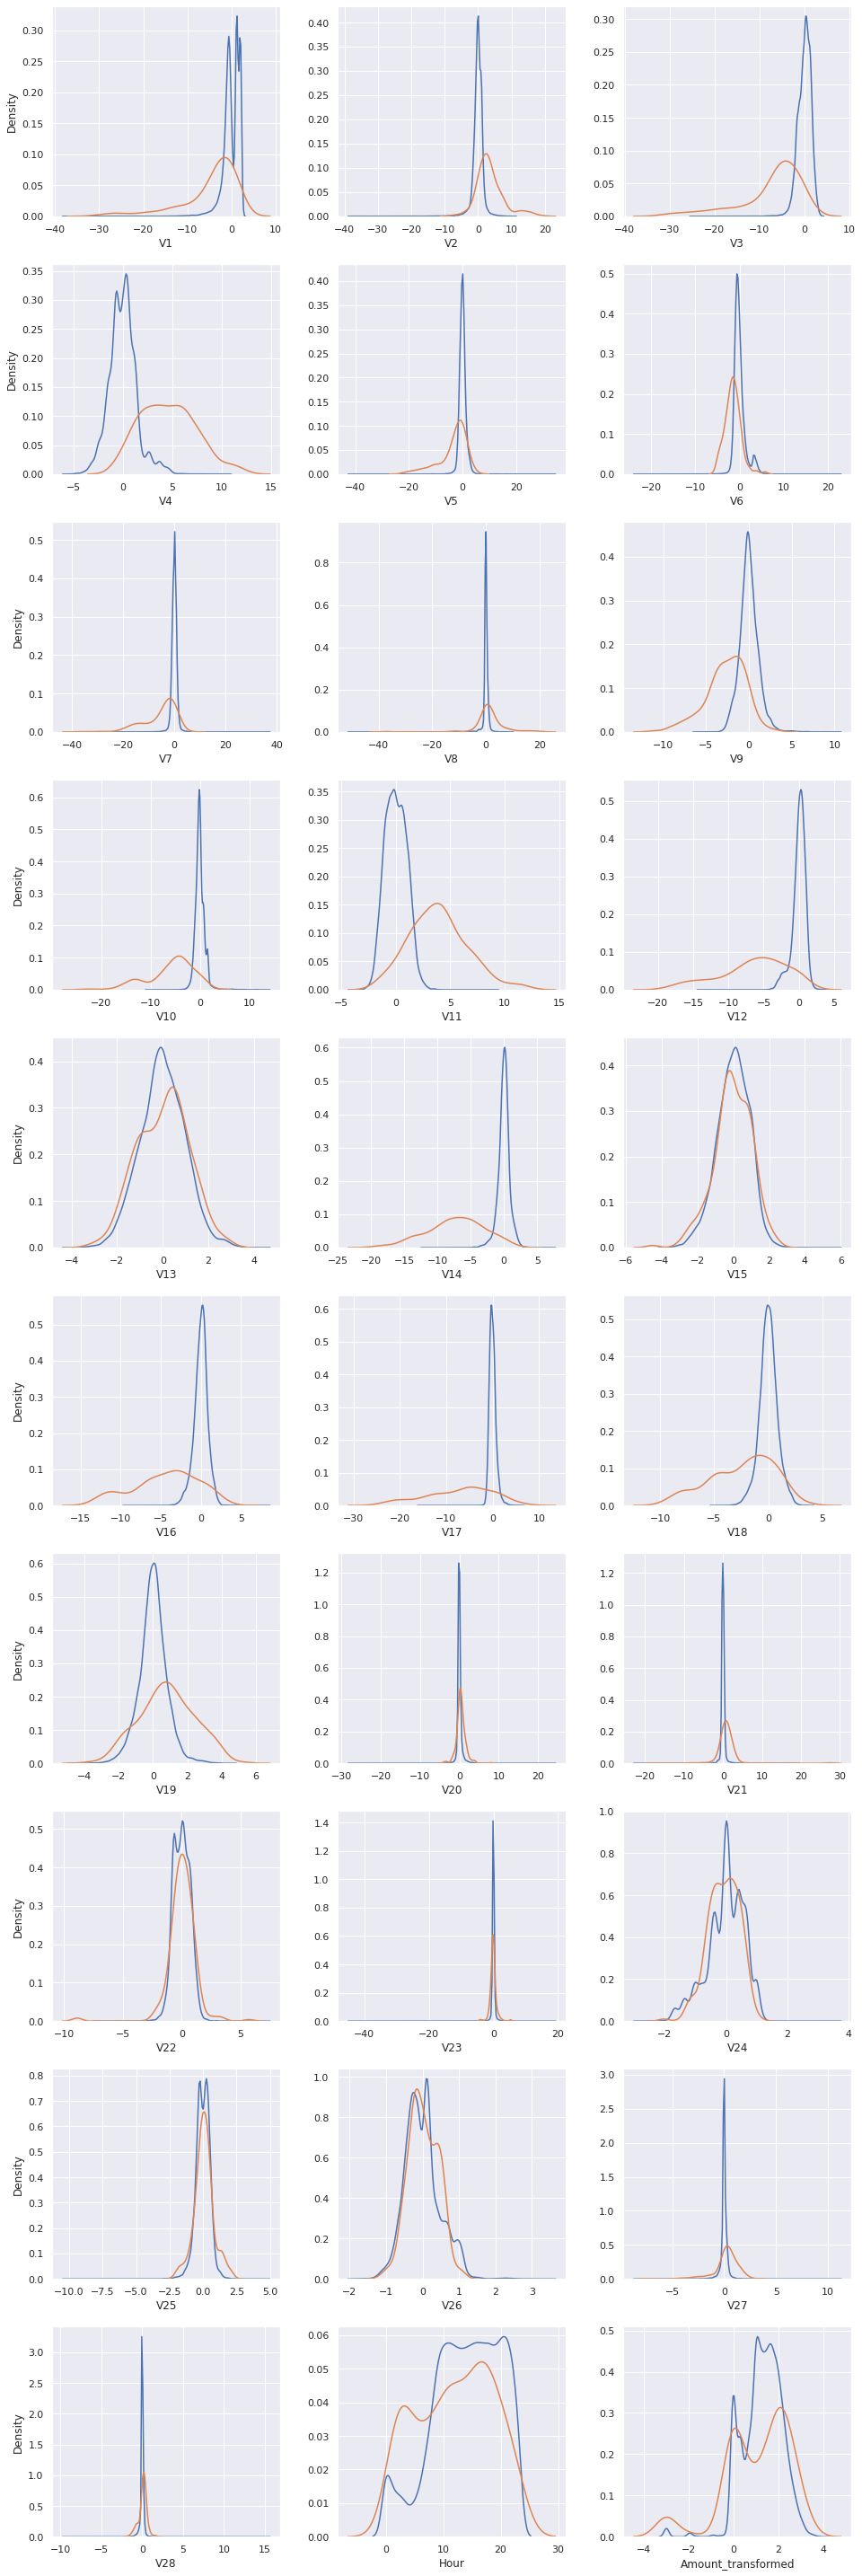

In [12]:
# Comparison of feature distributions for different target classes
data_val = pd.concat([X_val, y_val], axis = 1)
data_val_0, data_val_1 = data_val[data_val['Class'] == 0], data_val[data_val['Class'] == 1]
cols, ncols = list(X_val.columns), 3
nrows = math.ceil(len(cols) / ncols)
fig, ax = plt.subplots(nrows, ncols, figsize = (4.5 * ncols, 4 * nrows))
for i in range(len(cols)):
    sns.kdeplot(data_val_0[cols[i]], ax = ax[i // ncols, i % ncols])
    sns.kdeplot(data_val_1[cols[i]], ax = ax[i // ncols, i % ncols])
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")
plt.tight_layout()
plt.show()

In [13]:
# Feature selection
cols = ['V4', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Hour']
X_train_fs, X_val_fs, X_test_fs = X_train[cols], X_val[cols], X_test[cols]
X_train_fs.head()

,V4,V11,V12,V14,V16,V17,V18,V19,Hour
19594,-0.706232,2.027925,0.535822,0.250769,0.773615,0.449717,-1.963208,0.613481,8.0
124712,1.474933,-1.154523,0.263527,0.316174,-1.029415,1.030772,-0.438839,0.529080,21.0
167920,4.840766,-2.242431,0.034829,-0.546349,-0.070375,1.033695,0.531801,1.215045,9.0
47377,0.565273,-0.157045,-0.548790,0.419194,0.183518,-0.681323,0.911357,1.318132,11.0
41731,-0.428860,-0.580964,-0.609099,-0.187948,1.226723,0.104368,-0.995711,0.420557,11.0


In [12]:
# Runtime and memory usage
stop = time.time()
print(pd.Series({"Process runtime": "{:.2f} seconds".format(float(stop - start)),
                 "Process memory usage": "{:.2f} MB".format(float(process.memory_info()[0]/(1024*1024)))}).to_string())

Process runtime         25052.48 seconds
Process memory usage            30.84 MB
